# **DATA SET PREPARATION**

In [ ]:
import pandas as pd
import numpy as np

# Read the first dataset into DataFrame df
df = pd.read_csv('/content/smoke_detection_iot.csv')

# Convert UTC column to DateTime format
df['DateTime'] = pd.to_datetime(df['UTC'], unit='s')
# Extract Date and Time columns if needed
df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

# Display the dataset with DateTime columns
print("First Dataset with DateTime:")
df


First Dataset with DateTime:


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,DateTime,Date,Time
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0,2022-06-09 00:08:51,2022-06-09,00:08:51
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0,2022-06-09 00:08:52,2022-06-09,00:08:52
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0,2022-06-09 00:08:53,2022-06-09,00:08:53
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0,2022-06-09 00:08:54,2022-06-09,00:08:54
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0,2022-06-09 00:08:55,2022-06-09,00:08:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0,2022-06-13 14:20:47,2022-06-13,14:20:47
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0,2022-06-13 14:20:48,2022-06-13,14:20:48
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0,2022-06-13 14:20:49,2022-06-13,14:20:49
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0,2022-06-13 14:20:50,2022-06-13,14:20:50


In [ ]:
# Read the second dataset into another DataFrame
smoke_level = pd.read_csv('/content/Smoke level.csv')
provided_values = [306, 697, 306, 380, 455, 320, 320, 320, 306, 306, 306, 306, 306, 306, 502, 376, 366, 366, 365, 420, 349, 317, 317, 391, 421, 320]


# Merge the datasets based on similar Date/Time columns
df = pd.concat([df, smoke_level], axis=1, join='inner')

# Replace 'field1' column with 'smoke_level' and fill NaN with random numbers
df['smoke_level'] = df['field1']
# Replace 'smoke_level' column with different values for each entry
smoke_values = [random.choice(provided_values) for _ in range(len(df))]
df['smoke_level'] = smoke_values
df.drop('field1', axis=1, inplace=True)

# Display the updated DataFrame
print("\nMerged Dataset:")
print(df)


Merged Dataset:
    Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0            0  1654733331          20.000        57.36          0        400   
1            1  1654733332          20.015        56.67          0        400   
2            2  1654733333          20.029        55.96          0        400   
3            3  1654733334          20.044        55.28          0        400   
4            4  1654733335          20.059        54.69          0        400   
..         ...         ...             ...          ...        ...        ...   
21          21  1654733352          20.305        50.02          0        400   
22          22  1654733353          20.320        49.96          0        400   
23          23  1654733354          20.334        49.83          0        415   
24          24  1654733355          20.348        49.76          0        400   
25          25  1654733356          20.363        49.65          0        401   

    Raw H2

In [ ]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,...,NC1.0,NC2.5,CNT,Fire Alarm,DateTime,Date,Time,created_at,entry_id,smoke_level
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,...,0.0,0.0,0,0,2022-06-09 00:08:51,2022-06-09,00:08:51,2023-12-25 11:44:56 UTC,1,455
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,...,0.0,0.0,1,0,2022-06-09 00:08:52,2022-06-09,00:08:52,2023-12-25 11:45:13 UTC,2,306
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,...,0.0,0.0,2,0,2022-06-09 00:08:53,2022-06-09,00:08:53,2023-12-25 11:48:13 UTC,3,380
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,...,0.0,0.0,3,0,2022-06-09 00:08:54,2022-06-09,00:08:54,2023-12-25 11:48:29 UTC,4,366
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,...,0.0,0.0,4,0,2022-06-09 00:08:55,2022-06-09,00:08:55,2023-12-25 11:48:45 UTC,5,366


# **DATA CLEANING**

In [ ]:
# Remove specified columns from the DataFrame
columns_to_drop = ['Unnamed: 0', 'DateTime', 'created_at', 'entry_id']
df = df.drop(columns=columns_to_drop)




In [ ]:
# Print the updated DataFrame with the specified columns removed
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,Date,Time,smoke_level
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,2022-06-09,00:08:51,455
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,2022-06-09,00:08:52,306
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,2022-06-09,00:08:53,380
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,2022-06-09,00:08:54,366
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,2022-06-09,00:08:55,366


In [ ]:
# Get the 'Date' and 'Time' columns
date_column = df.pop('Date')
time_column = df.pop('Time')

# Insert 'Date' and 'Time' columns at the beginning of the DataFrame
df.insert(0, 'Date', date_column)
df.insert(1, 'Time', time_column)




In [ ]:
# Print the updated DataFrame
df.head()

,Date,Time,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,smoke_level
0,2022-06-09,00:08:51,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,455
1,2022-06-09,00:08:52,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,306
2,2022-06-09,00:08:53,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,380
3,2022-06-09,00:08:54,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,366
4,2022-06-09,00:08:55,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,366


In [ ]:
# Save the cleaned DataFrame 'df' as a CSV file
df.to_csv('Final_Dataset.csv', index=False)

# Confirmation message
print("The cleaned data has been saved as 'cleaned_data.csv'")


The cleaned data has been saved as 'cleaned_data.csv'


In [ ]:
# gives info of column data types
print(df.info())
# gives total number of missing data, if found missing then
# data has to be manually completed and filled in excel file
print("Total number of Null values in each column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            26 non-null     object 
 1   Time            26 non-null     object 
 2   UTC             26 non-null     int64  
 3   Temperature[C]  26 non-null     float64
 4   Humidity[%]     26 non-null     float64
 5   TVOC[ppb]       26 non-null     int64  
 6   eCO2[ppm]       26 non-null     int64  
 7   Raw H2          26 non-null     int64  
 8   Raw Ethanol     26 non-null     int64  
 9   Pressure[hPa]   26 non-null     float64
 10  PM1.0           26 non-null     float64
 11  PM2.5           26 non-null     float64
 12  NC0.5           26 non-null     float64
 13  NC1.0           26 non-null     float64
 14  NC2.5           26 non-null     float64
 15  CNT             26 non-null     int64  
 16  Fire Alarm      26 non-null     int64  
 17  smoke_level     26 non-null     int64

In [ ]:
df.head()

,Date,Time,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,smoke_level
0,2022-06-09,00:08:51,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,455
1,2022-06-09,00:08:52,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,306
2,2022-06-09,00:08:53,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,380
3,2022-06-09,00:08:54,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,366
4,2022-06-09,00:08:55,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,366


## **PREDICTIVE ANALYSIS-ML MODEL APPLICATION**

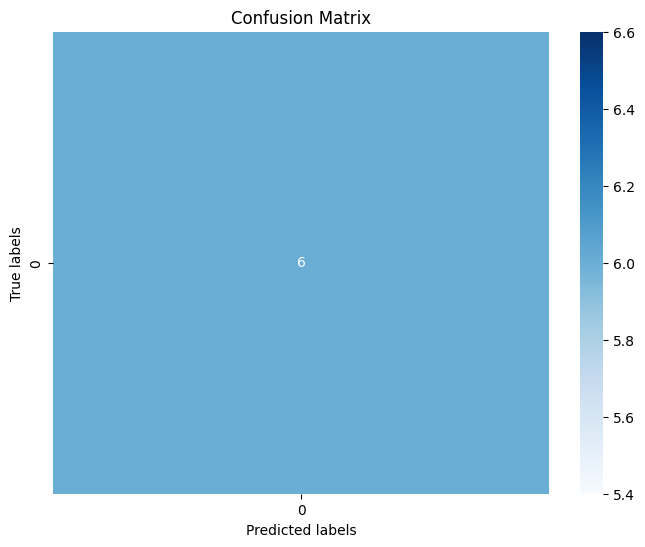

<ipython-input-128-ba09c22b3d69>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='mako',annot_kws={"size":14})


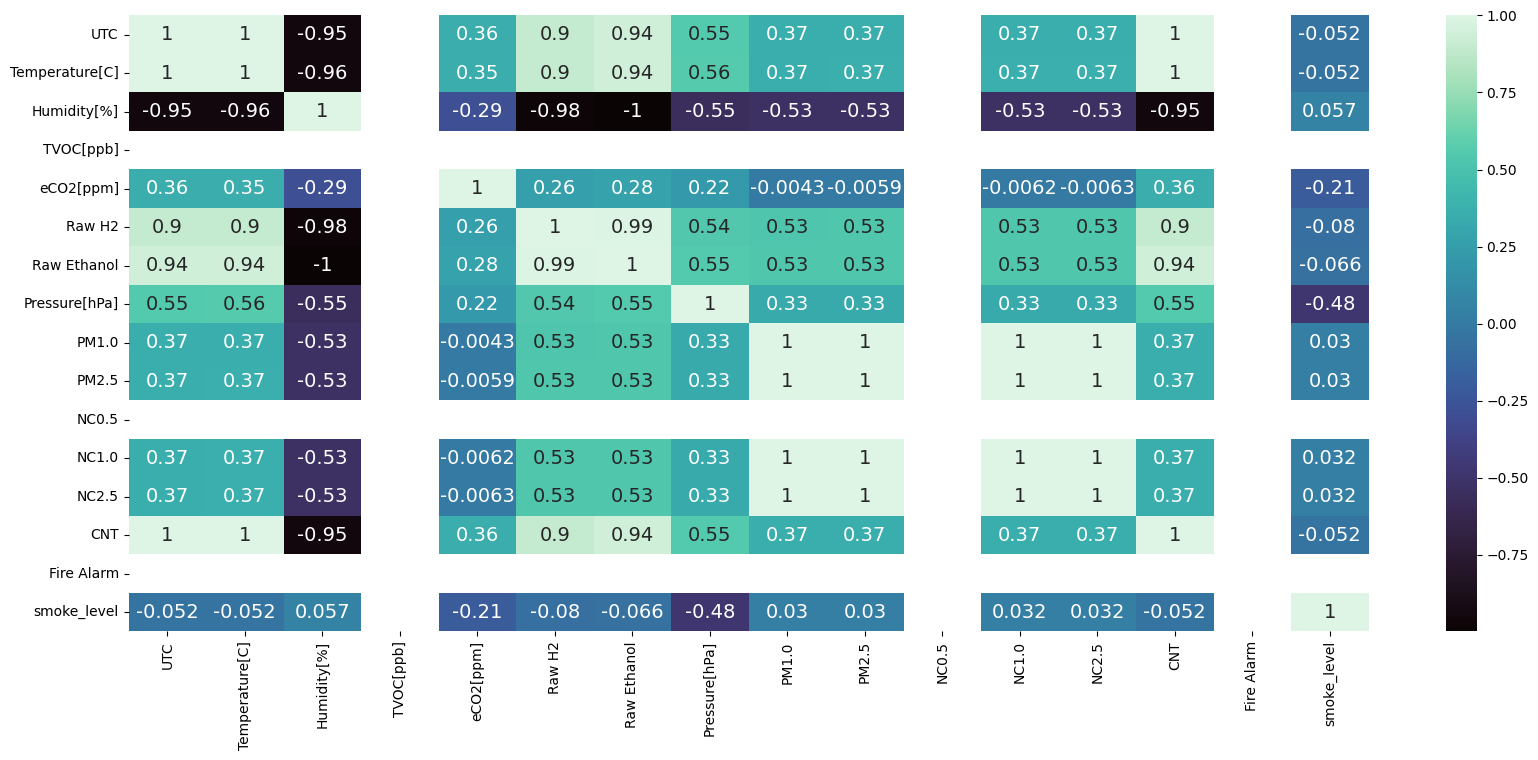

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Drop non-numeric columns and Fire Alarm from input (X) and store Fire Alarm as output (y)
X = df.drop(['Date', 'Time', 'UTC', 'Fire Alarm', 'smoke_level'], axis=1)
y = df['Fire Alarm']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier with a specified value of k (e.g., k=3)
k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='mako',annot_kws={"size":14})
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to compare predicted and actual labels
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display more rows by indexing
print(comparison_df[:6])  # Change '20' to the desired number of rows

# Export the DataFrame to an Excel file
comparison_df.to_excel('comparison_results.xlsx', index=False)


    Actual  Predicted
8        0          0
16       0          0
0        0          0
24       0          0
11       0          0
9        0          0
